## Introduction to statistical visualization with seaborn

In this session, we will discuss another Python visualization library called seaborn. Seaborn is a visualization which is built on top of Matplotlib, but has plots created specifically for statistical visualization.

Beacause seaborn builds on Matplotlib, having a good understanding of Matplotlib will help you create better seaborn plots. This will be an introduction to what is possible with seaborn. We encourage you to check it out further by viewing the documentation or the example gallery.

In [3]:
import pandas as pd

# read in csv file
df = pd.read_csv("data/PubChemElements_all.csv")

# preview first five rows
df.head()

,AtomicNumber,Symbol,Name,AtomicMass,CPKHexColor,ElectronConfiguration,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,OxidationStates,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,YearDiscovered
0,1,H,Hydrogen,1.008000,FFFFFF,1s1,2.20,120.0,13.598,0.754,"+1, -1",Gas,13.81,20.28,0.000090,Nonmetal,1766
1,2,He,Helium,4.002600,D9FFFF,1s2,NaN,140.0,24.587,NaN,0,Gas,0.95,4.22,0.000179,Noble gas,1868
2,3,Li,Lithium,7.000000,CC80FF,[He]2s1,0.98,182.0,5.392,0.618,+1,Solid,453.65,1615.00,0.534000,Alkali metal,1817
3,4,Be,Beryllium,9.012183,C2FF00,[He]2s2,1.57,153.0,9.323,NaN,+2,Solid,1560.00,2744.00,1.850000,Alkaline earth metal,1798
4,5,B,Boron,10.810000,FFB5B5,[He]2s2 2p1,2.04,192.0,8.298,0.277,+3,Solid,2348.00,4273.00,2.370000,Metalloid,1808


Text(0.5, 0, 'Atomic Mass')

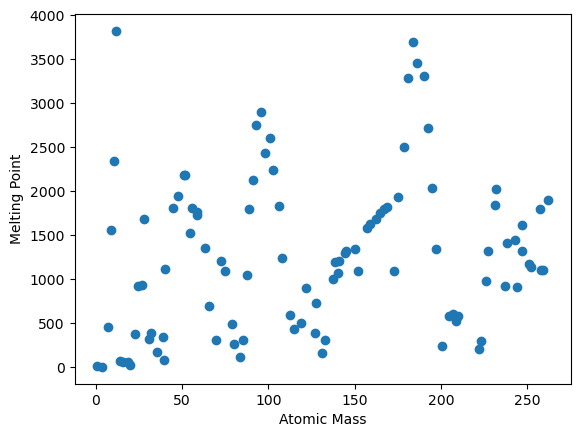

In [4]:
# Review - plotting with matplotlib

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter("AtomicMass", "MeltingPoint", data=df)
ax.set_ylabel("Melting Point")
ax.set_xlabel("Atomic Mass")

In [5]:
# import seaborn
import seaborn as sns

In [6]:
# Visualize linear relationships

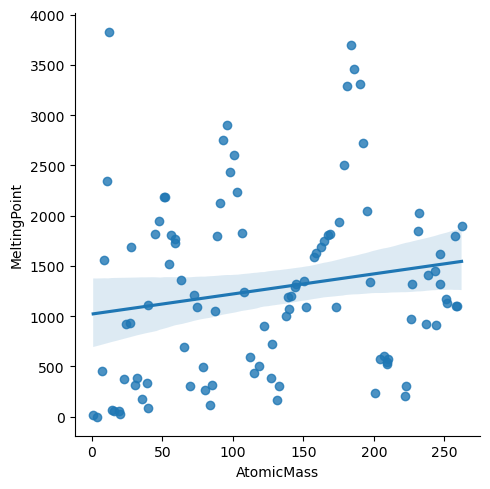

In [7]:
g = sns.lmplot(x="AtomicMass", y="MeltingPoint", data=df)

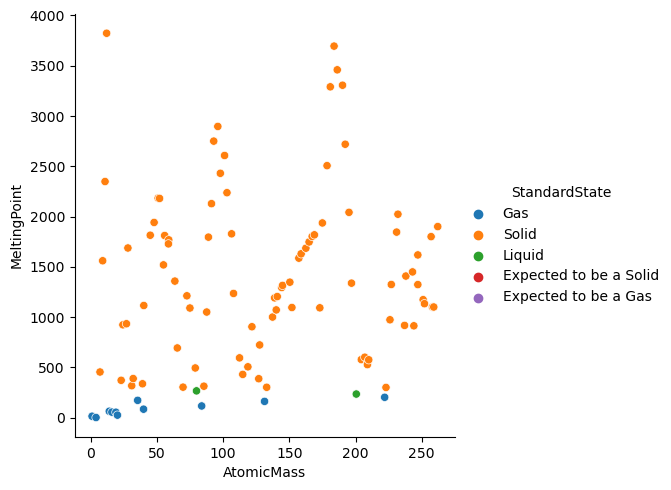

In [8]:
# Visualize relational plots
g = sns.relplot(x="AtomicMass", y="MeltingPoint", data=df, hue="StandardState")

In [9]:
# Facet grid

df_numeric = df.select_dtypes(include='number')

df_melt = df_numeric.melt(id_vars=["MeltingPoint", "AtomicNumber"])
df_melt.head()

,MeltingPoint,AtomicNumber,variable,value
0,13.81,1,AtomicMass,1.008000
1,0.95,2,AtomicMass,4.002600
2,453.65,3,AtomicMass,7.000000
3,1560.00,4,AtomicMass,9.012183
4,2348.00,5,AtomicMass,10.810000


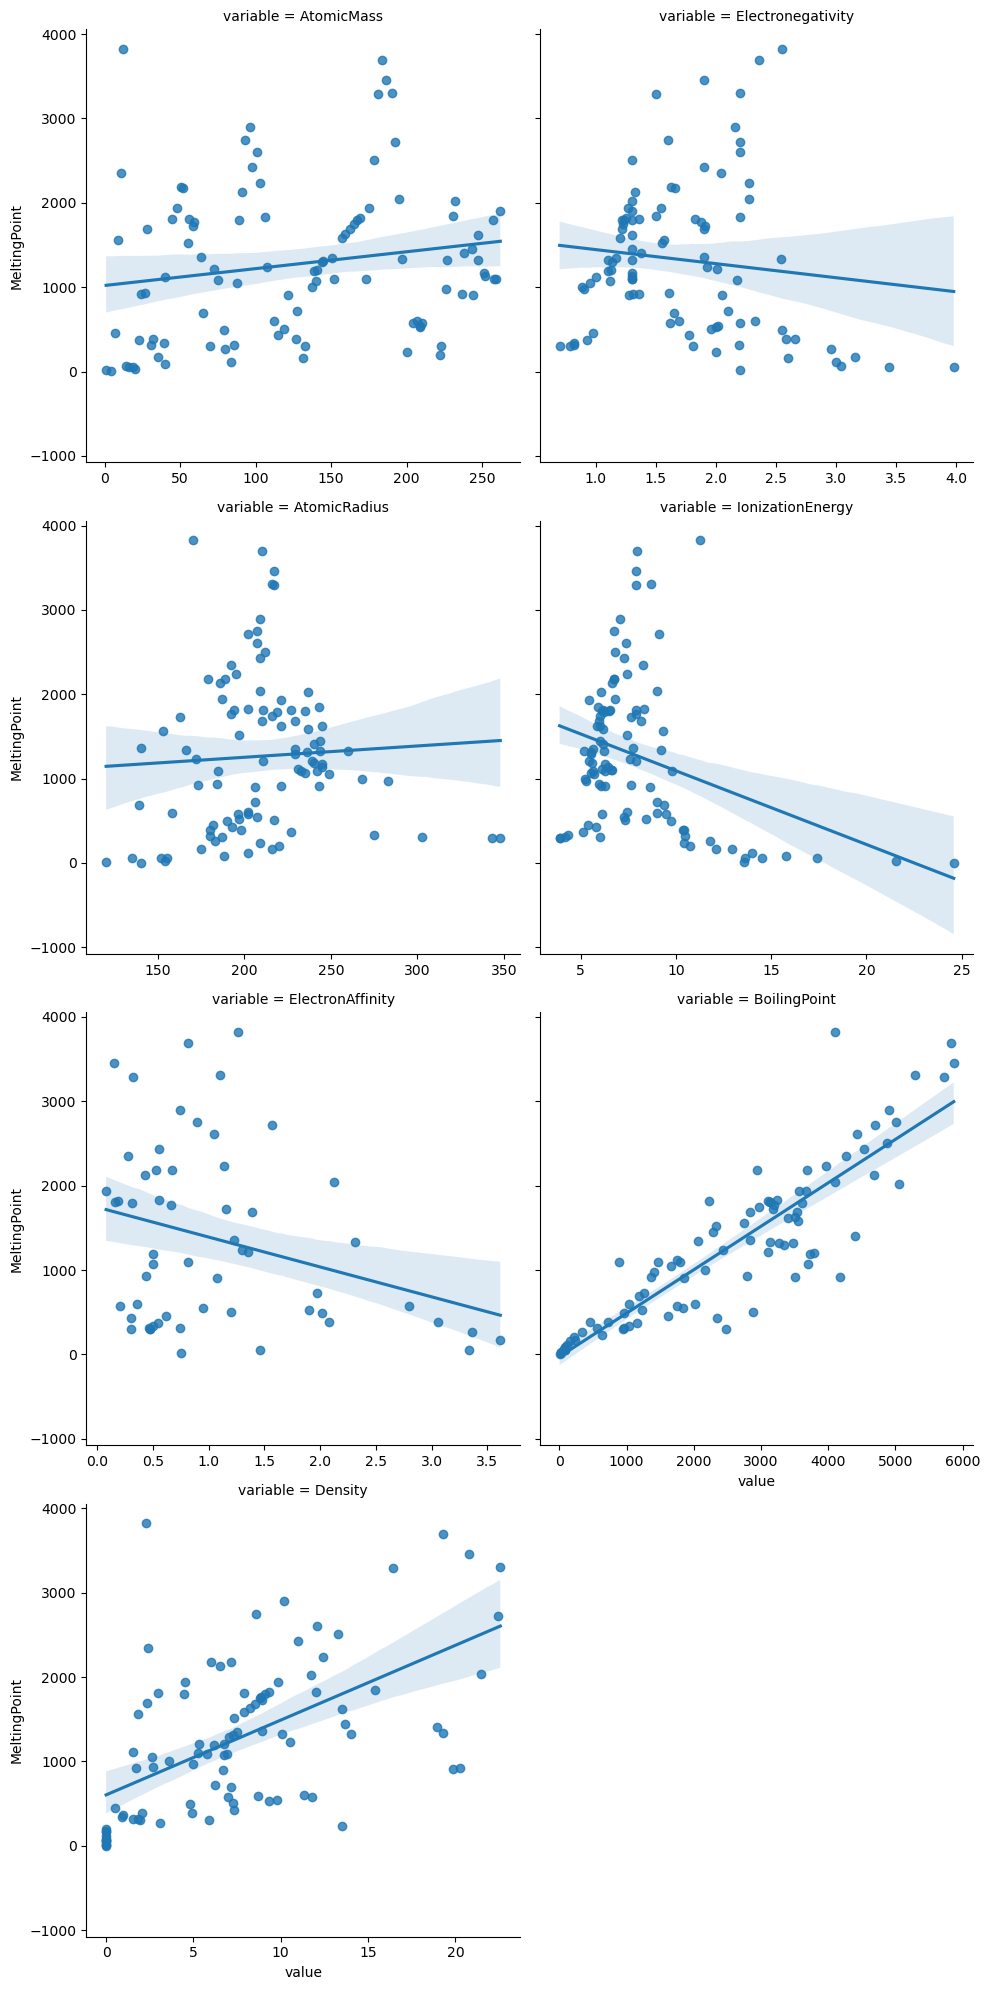

In [10]:
g = sns.lmplot(data=df_melt, y="MeltingPoint", x="value", col="variable", col_wrap=2, facet_kws={"sharex": False})

In [11]:
df_numeric["StandardState"] = df["StandardState"].copy()
df_melt = df_numeric.melt(id_vars=["MeltingPoint", "StandardState", "AtomicNumber"])
df_melt.head()

,MeltingPoint,StandardState,AtomicNumber,variable,value
0,13.81,Gas,1,AtomicMass,1.008000
1,0.95,Gas,2,AtomicMass,4.002600
2,453.65,Solid,3,AtomicMass,7.000000
3,1560.00,Solid,4,AtomicMass,9.012183
4,2348.00,Solid,5,AtomicMass,10.810000


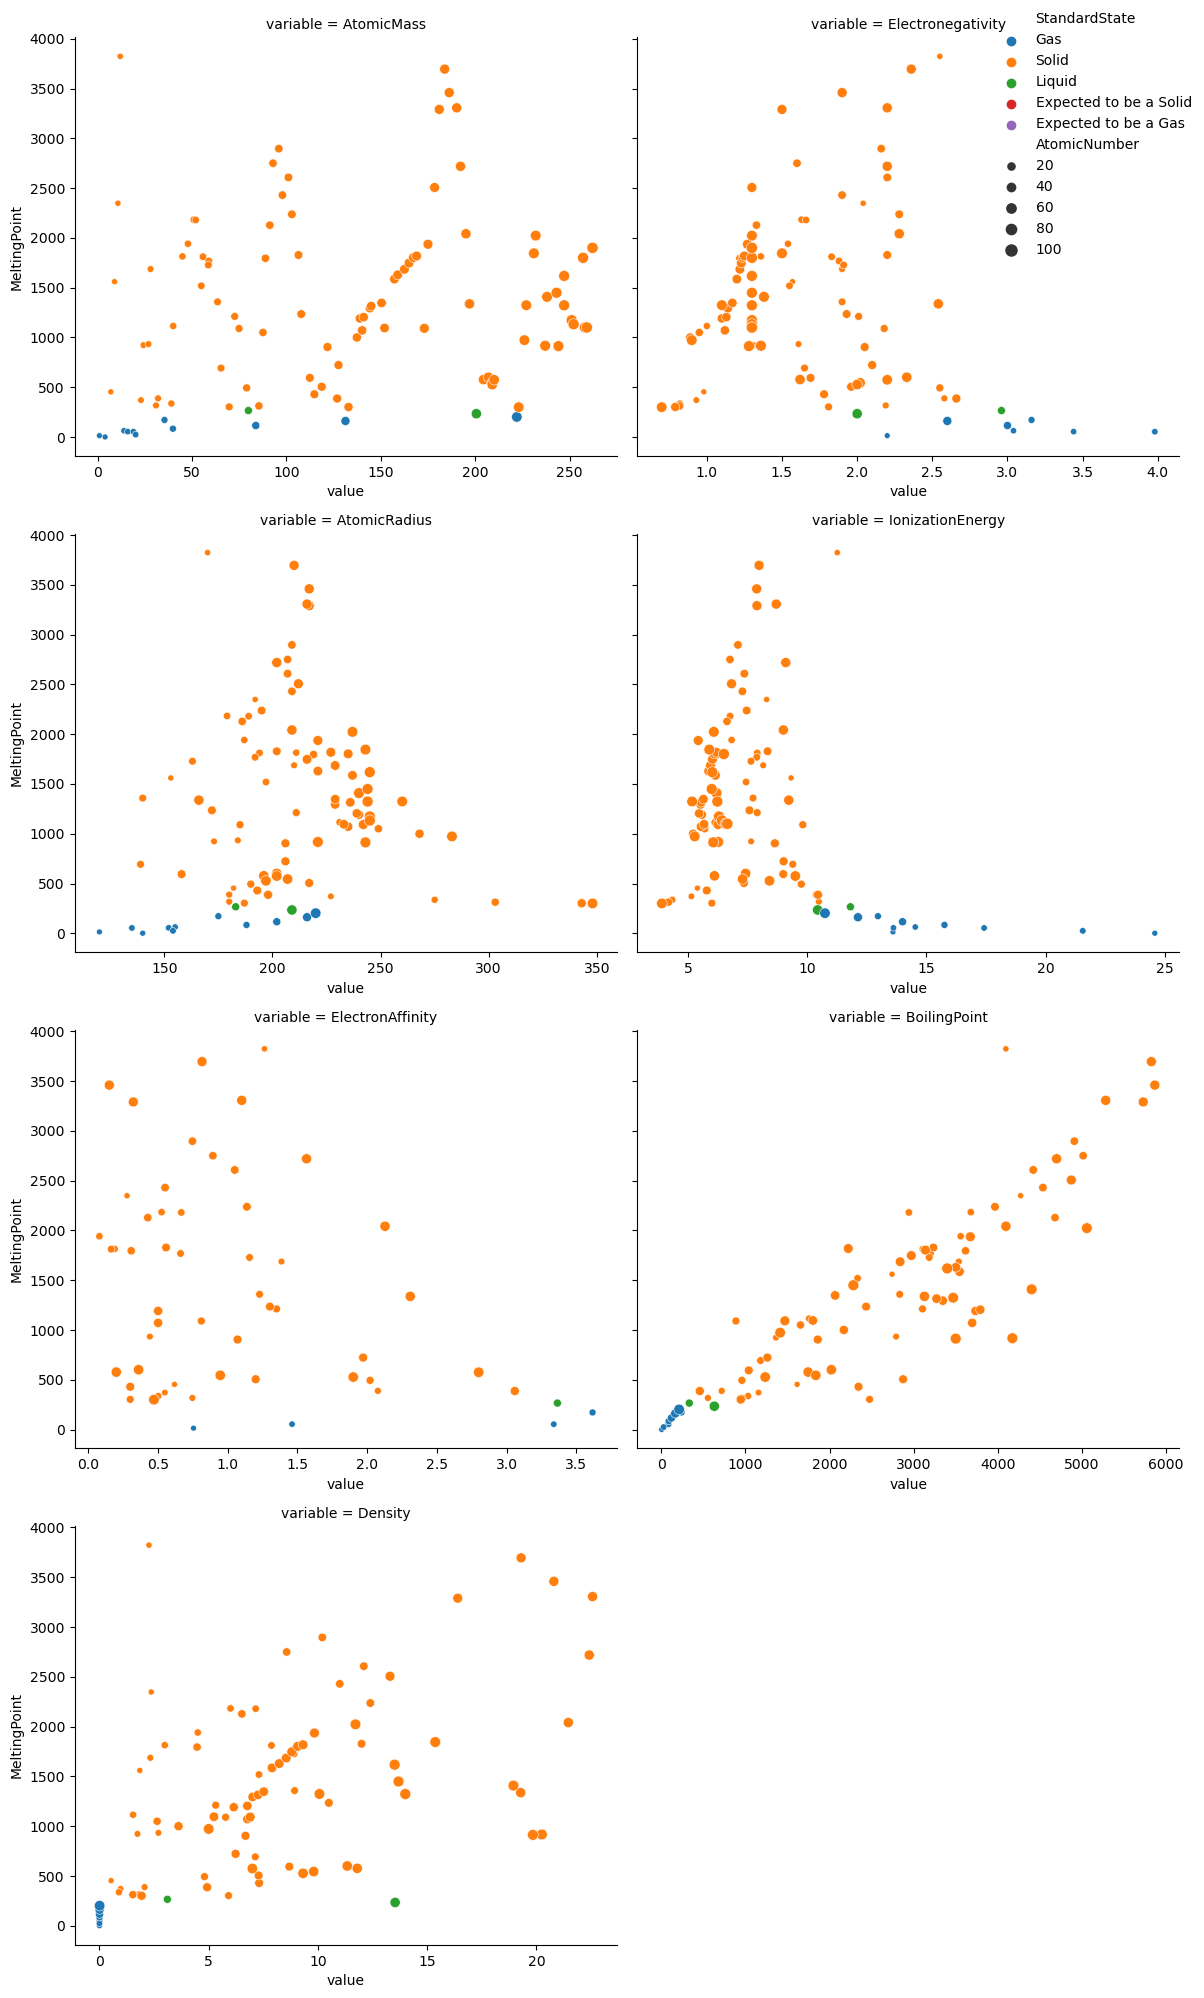

In [12]:
g = sns.relplot(data=df_melt, 
                y="MeltingPoint", 
                x="value", col="variable", 
                col_wrap=2, facet_kws={"sharex": False}, 
                hue="StandardState", size="AtomicNumber")
sns.move_legend(g, "upper right")
plt.tight_layout()

/tmp/ipykernel_97/2679652979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="rocket_r", annot=True)


<AxesSubplot: >

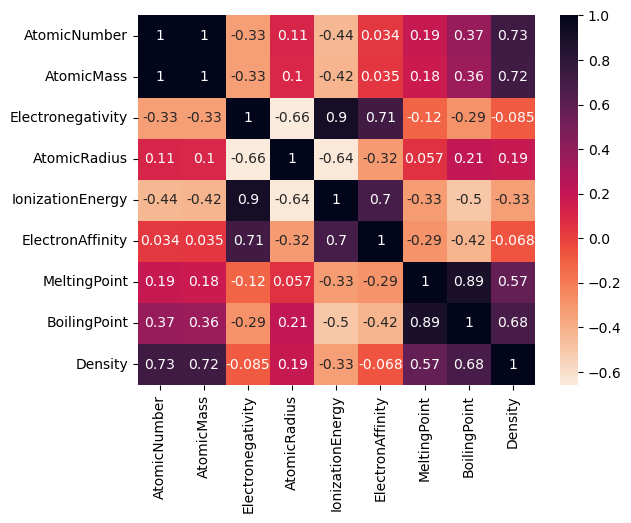

In [14]:
# Correlation plot - see which columns are correlated.
sns.heatmap(df.corr(), cmap="rocket_r", annot=True)